### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load and Prepare the Data

In [2]:
df = pd.read_csv('../house_price_prediction_dataset.csv')

In [3]:
df.head()

,Size (sqft),Price
0,4058.131,650838.379
1,9531.786,1353425.502
2,7453.942,1200834.427
3,6187.256,1026269.838
4,1982.177,365198.110


In [4]:
X = df.drop(columns=['Price'])
y = df['Price'] 

In [5]:
y

0       650838.379
1      1353425.502
2      1200834.427
3      1026269.838
4       365198.110
          ...     
995      81723.702
996    1376282.422
997     277061.568
998    1443321.965
999     669739.150
Name: Price, Length: 1000, dtype: float64

### Split the Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Linear Regression class

In [7]:
class LINEARREGRESSION:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        # Convert to numpy arrays if they are Pandas Series or DataFrames
        if isinstance(X_train, pd.Series) or isinstance(X_train, pd.DataFrame):
            X_train = X_train.values.flatten()
        if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
            y_train = y_train.values.flatten()
            
        numenator = 0
        denominator = 0
        
        for i in range(X_train.shape[0]):
            numenator = numenator + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            denominator = denominator + ((X_train[i] - X_train.mean()) ** 2)
            
        self.m = numenator/denominator
        self.b = y_train.mean() - (self.m * X_train.mean())
        
    def predict(self, X_test):
        if isinstance(X_test, pd.Series) or isinstance(X_test, pd.DataFrame):
            X_test = X_test.values.flatten()
        return (self.m * X_test) + self.b
    
    def coefficients(self):
        return self.m
    
    def intercept(self):
        return self.b
    

### Create and Train the Model

In [8]:
model = LINEARREGRESSION()
model.fit(X_train, y_train)

### Make Predictions

In [9]:
y_pred = model.predict(X_test)

In [10]:
intercept = model.intercept()
coefficients = model.coefficients()

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: 19911.346713463427
Coefficients: 154.14839440863338


### Evaluate the Model

In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8573553080.211827
R-squared: 0.9548168861213884


### Visualize the Results

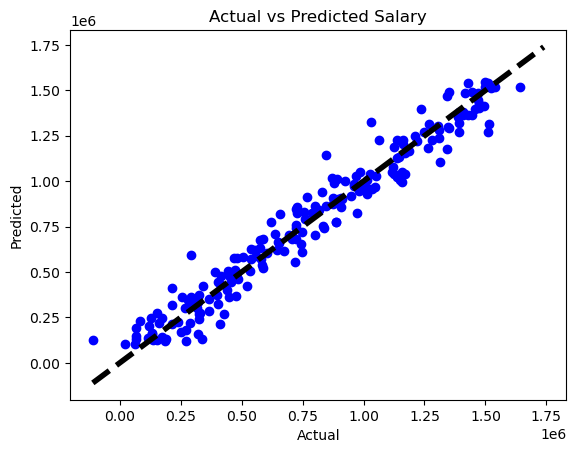

In [13]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary')
plt.show()
